In [15]:
# imports
import numpy as np 
import matplotlib.pyplot as ptl
import os
import cv2

#Hay que cambiar el directorio a uno propio
#Change datadir with your own data directory
DATADIR = "/home/mario/Escritorio/Github/Artistic-Passing-Style-NN/src/data"
# 3 categorias por simplicidad
CATEGORIES = ["abstracto","impresionista","puntillista"]

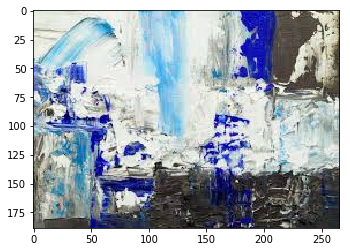

In [2]:
# Iterate over the directories to load the images 
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        ptl.imshow(img_array, cmap = "gray")
        ptl.show()
        break
    break

In [3]:
# redimincionamos el tamaño de la imagen
# We have to change the size of the images in terms of pixel
IMG_SIZE = 100 #number of pixels


In [4]:
training_data = []

def create_training_data():
    """ load and resize the images """
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img)) #read
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #resize 
                training_data.append([new_array, class_num]) #store in list
            except Exeption as e:
                print("READ IMAGE ERROR: ITS NOT POSSIBLE TO READ AN IMAGE FROM THE DIRECTORY")
                pass
            
create_training_data()
            
print(len(training_data))


23


In [5]:
import random

random.shuffle(training_data)

In [6]:
#Empezamos a crear nuestro modelo
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [7]:
#ejemplo del array (test)
X[1]

array([[[205, 205, 209],
        [173, 205, 211],
        [ 74, 198, 218],
        ...,
        [ 67, 182, 197],
        [104, 186, 196],
        [ 83, 186, 199]],

       [[147, 215, 229],
        [125, 213, 233],
        [103, 212, 231],
        ...,
        [179, 198, 198],
        [163, 199, 200],
        [214, 201, 198]],

       [[102, 222, 240],
        [211, 234, 246],
        [224, 232, 244],
        ...,
        [191, 203, 205],
        [155, 207, 213],
        [ 40, 195, 219]],

       ...,

       [[178, 154,  70],
        [208, 195, 145],
        [225, 219, 185],
        ...,
        [164, 144,  59],
        [197, 186, 155],
        [202, 190, 164]],

       [[218, 184, 151],
        [210, 174, 138],
        [216, 183, 137],
        ...,
        [156, 136,  45],
        [208, 194, 179],
        [191, 168, 145]],

       [[203, 168, 129],
        [198, 158, 110],
        [236, 221, 205],
        ...,
        [161, 142,  55],
        [191, 182, 153],
        [145, 121,  33]]

In [8]:
#guardamos nuestra informacion
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()